In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataset = pd.read_csv(r"C:\Users\jayes\OneDrive\Desktop\python_MI\ML_assignment\Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

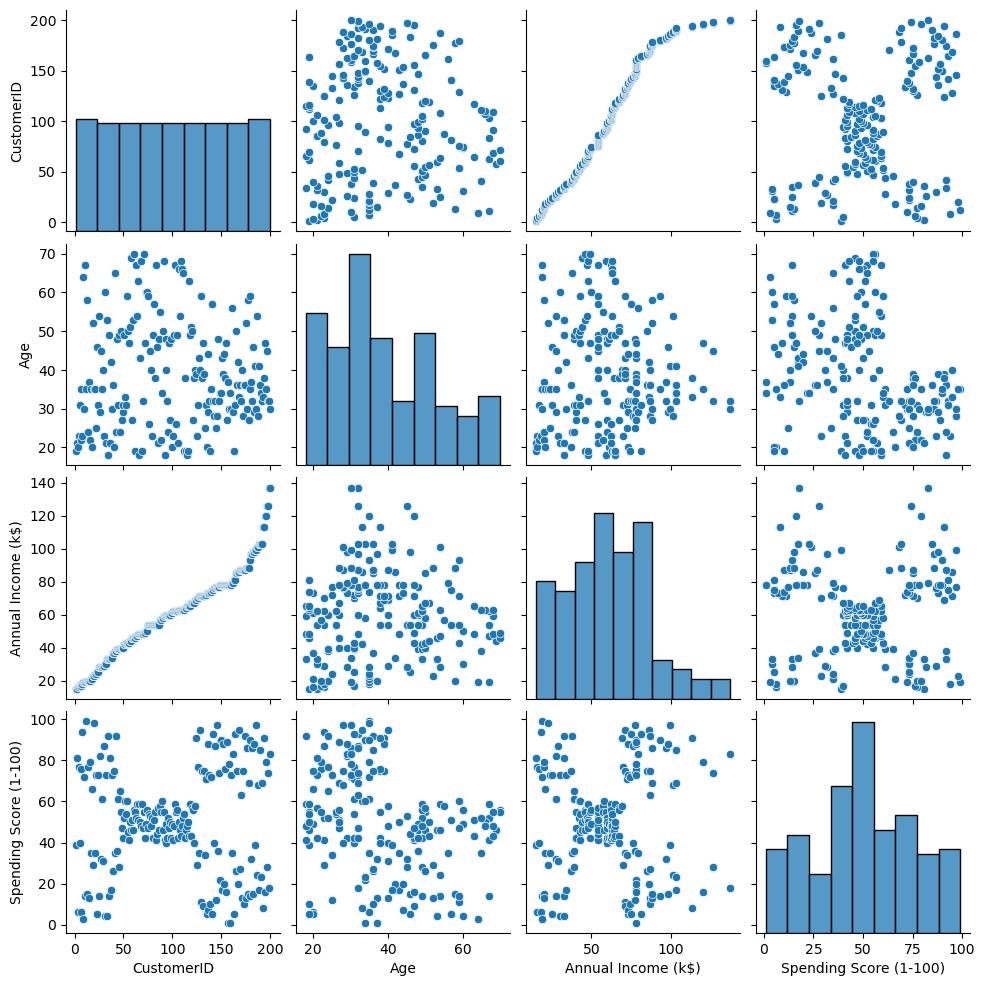

In [20]:
sns.pairplot(dataset)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

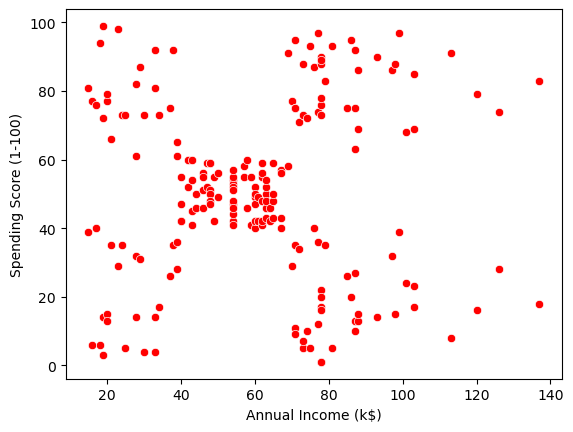

In [22]:
sns.scatterplot(x=dataset['Annual Income (k$)'],y=dataset['Spending Score (1-100)'],color='red')

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Genre']=le.fit_transform(dataset['Genre'])
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [30]:
from sklearn.cluster import KMeans
X=dataset.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [33]:
model=KMeans(n_clusters=3)
model.fit(X)

C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [35]:
preds=model.predict(X)
preds



array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [41]:
model.inertia_

106348.37306211119

In [47]:
from sklearn.metrics import silhouette_score
score=silhouette_score(X,preds)
score

0.46761358158775435

In [48]:
inertia=[]
for i in range(2,16):
    model=KMeans(n_clusters=i)
    model.fit(X)

    inertia.append(model.inertia_)


inertia
    

C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[186362.95600651758,
 106348.37306211119,
 73679.78903948834,
 74231.30697733638,
 37265.86520484346,
 34227.26801578743,
 28418.169539251754,
 23217.414049057694,
 21111.604364166087,
 19602.71523263558,
 16485.524728212964,
 15624.42602952603,
 14389.717379470181,
 13381.886223484118]

<Axes: >

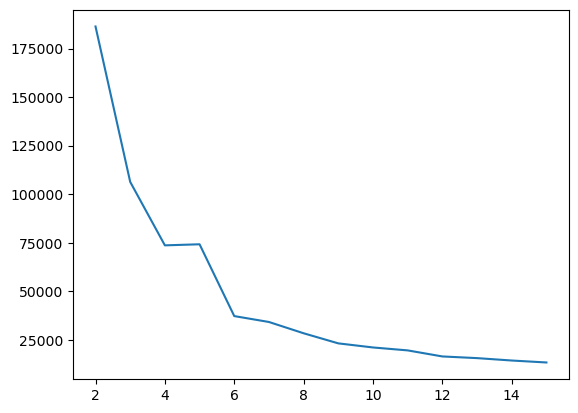

In [49]:
sns.lineplot(x=range(2,16),y=inertia)

In [51]:
model=KMeans(n_clusters=5)
model.fit(X)


C:\Users\jayes\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [52]:
model.inertia_

44448.45544793371

In [59]:
preds=model.predict(X)
preds

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4,
       1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3,
       4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [60]:
score=silhouette_score(X,preds)
score

0.553931997444648

In [65]:
centers=model.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852]])

Text(0, 0.5, 'Spending Score')

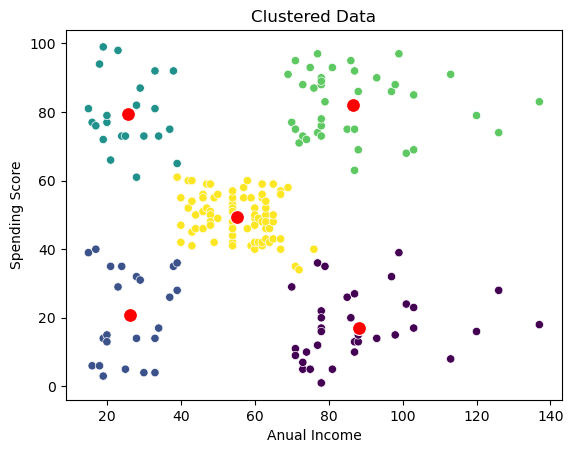

In [73]:
plt.title("Clustered Data")
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], c=preds)
sns.scatterplot(x=centers[:,0], y=centers[:,1], s=100, color='red')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')

In [76]:
# Agglomerative clustering

In [80]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)

cluster = model.fit(X)
cluster

AgglomerativeClustering(n_clusters=5)

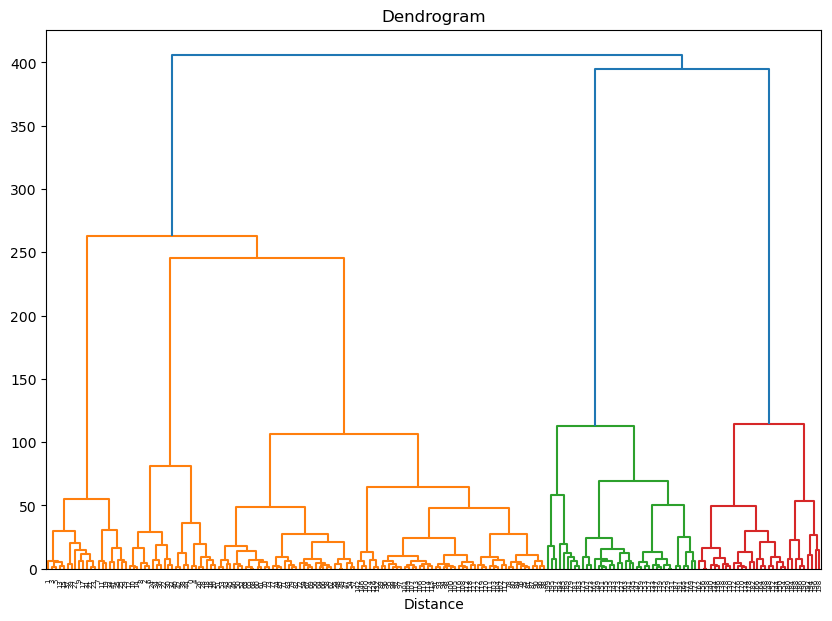

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
link = linkage(X, method='ward')

plt.figure(figsize=(10,7))
plt.title('Dendrogram')

dendrogram(link)
plt.xlabel('Index')
plt.xlabel('Distance')
plt.show()